# Data augmentation with Keras

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy  import misc, ndimage
import keras
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
%matplotlib

Using TensorFlow backend.


Using matplotlib backend: TkAgg


In [7]:
train_path = "/home/v-nitin.gupta/Desktop/keras/data_set/dogscats/train/"

test_path = "/home/v-nitin.gupta/Desktop/keras/data_set/dogscats/test1"

validation_path = "/home/v-nitin.gupta/Desktop/keras/data_set/dogscats/valid/"

In [8]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=["cats","dogs"],batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=["cats","dogs"],batch_size=10)

validation_batches = ImageDataGenerator().flow_from_directory(validation_path,target_size=(224,224),classes=["cats","dogs"],batch_size=10)

Found 23000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [10]:
gen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,
                        shear_range=0.15,zoom_range=0.1,channel_shift_range=10,
                        horizontal_flip=True)

In [11]:
image_path = "/home/v-nitin.gupta/Desktop/keras/data_set/dogscats/train/cats/cat.0.jpg"

In [12]:
image = np.expand_dims(ndimage.imread(image_path),0)

/home/v-nitin.gupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


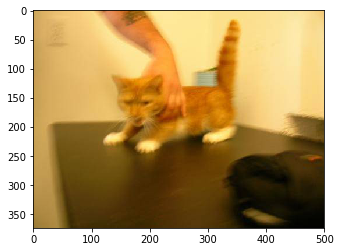

In [13]:
plt.imshow(image[0])

In [14]:
aug_iter = gen.flow(image)

In [15]:
aug_image = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

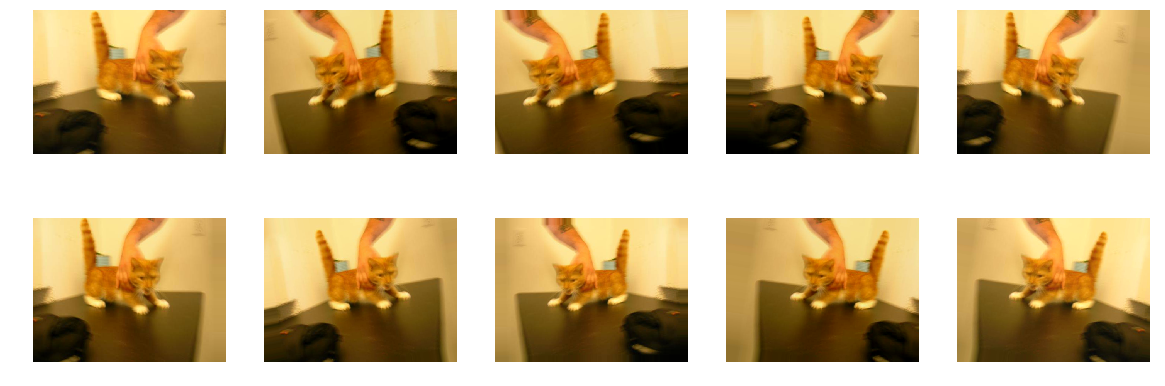

In [16]:
plots(aug_image,figsize=(20,7),rows=2)